# Day 5 - Data Science Training

## K-Fold Cross validation

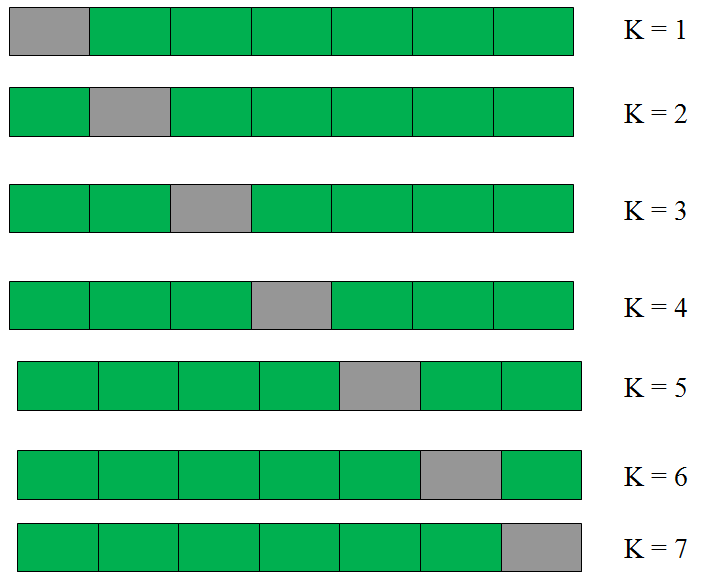

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm

In [44]:
datasets.

NameError: name 'datases' is not defined

In [9]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [41]:
x.shape

(150, 4)

In [11]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
y[:5]

array([0, 0, 0, 0, 0])

In [42]:
y.shape

(150,)

In [25]:
# split data in traing and testing subsets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [26]:
# build the model
clf = svm.SVC(kernel='linear', C=1)

# Train the model
clf = clf.fit(x_train, y_train)

In [27]:
clf.score(x_test, y_test)

0.9666666666666667

## Cross validation for 5 K-folds

In [38]:
scores = cross_val_score(clf, x, y, cv=5)
print( scores )
print( scores.mean() )

[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.9800000000000001


In [46]:
# pip install tensorflow
import tensorflow

# pip install tensorflow==2.3.0 --user

In [48]:
tensorflow.__version__

'2.3.0'

In [ ]:
pip install tensorflow

# Time Series Forecasting

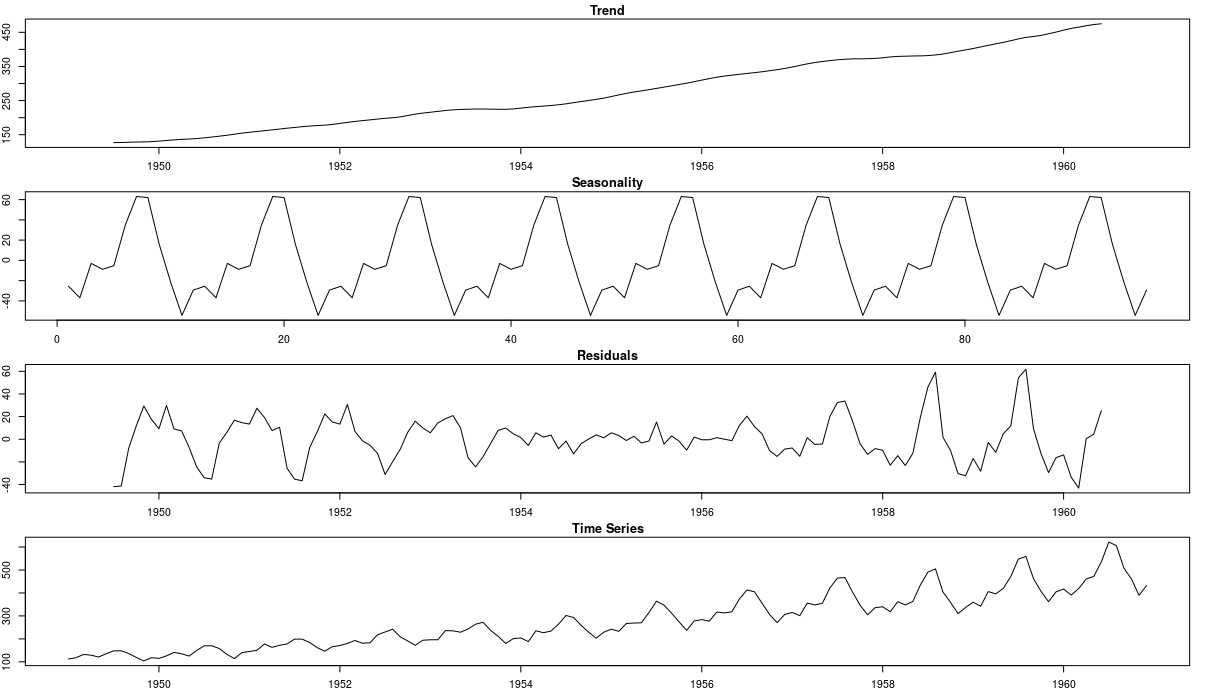

In [50]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [52]:
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [54]:
data = pd.read_csv('AirPassengers.csv')
data.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [58]:
data.shape

(144, 2)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [62]:
data['Month'] = pd.to_datetime(data.Month)
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [64]:
# We have 12 years of data. 
# We will keep 11 years data as training
# 1 year data (12 months) as testing

In [67]:
train = data.loc[:len(data)-12, :]
test = data.loc[len(data)-12:, :]

Text(0.5, 1.0, 'No of air passengers')

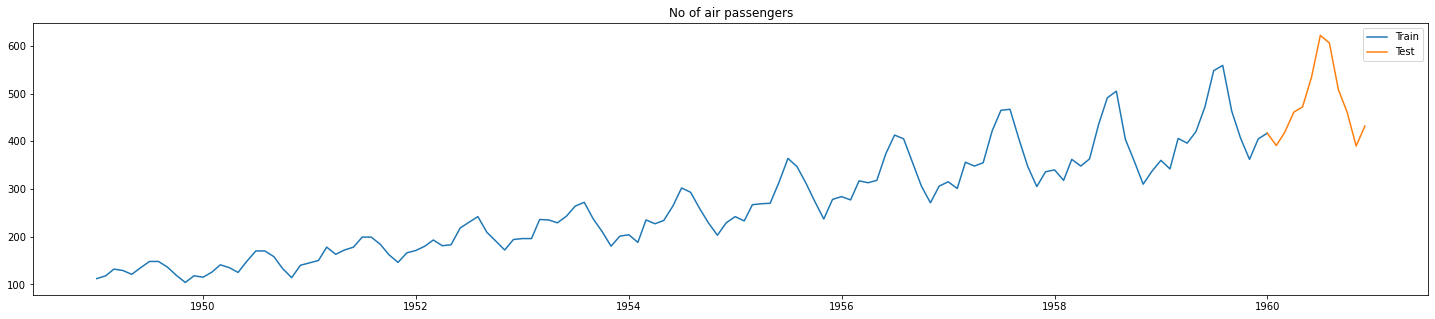

In [68]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot('Month', '#Passengers', data=train, label='Train')
ax.plot('Month', '#Passengers', data=test, label='Test')
ax.legend()
ax.set_title('No of air passengers')

# Build Model

In [ ]:
Trend Elements
There are three trend elements that require configuration.
They are the same as the ARIMA model; specifically:
p: Trend autoregression order.
d: Trend difference order.
q: Trend moving average order.

Seasonal Elements
There are four seasonal elements that are not part of ARIMA that must be configured; they are:
P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

In [73]:
model = auto_arima(train['#Passengers'], 
                   seasonal=True, 
                   m=12,
                   max_p=7, max_d=5, max_q=7, 
                   max_P=4, max_D=4, max_Q=4, 
                   scoring='mse',
                   trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=912.700, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=907.606, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=908.564, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=906.884, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=907.882, Time=0.05 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=908.389, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=908.081, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=907.694, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=910.080, Time=0.05 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=908.515, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.047 seconds


In [74]:
model.fit(train['#Passengers'])

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [78]:
# Forecast for testing data

forecast = test.copy()  # Making deep copy
forecast['Predicted_Passengers'] = model.predict(n_periods= len(test))

Text(0.5, 1.0, 'No of air passengers')

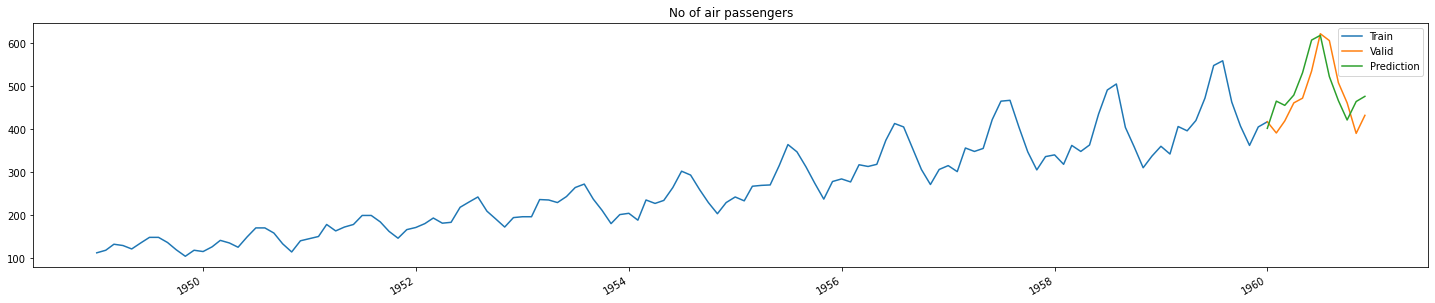

In [84]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(train['Month'], train['#Passengers'], label='Train')
ax.plot(test['Month'], test['#Passengers'], label='Valid')
ax.plot(forecast['Month'], forecast['Predicted_Passengers'], label='Prediction')
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
ax.legend()
ax.set_title('No of air passengers')

In [82]:
forecast.head(2)

,Month,#Passengers,Predicted_Passengers
132,1960-01-01,417,401.764762
133,1960-02-01,391,465.069861


In [89]:
# Forecast for testing data

forecast['Predicted_Passengers'] = model.predict(n_periods= len(test) )

# Time Series - Energy Production

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os

In [105]:
data = pd.read_csv('IPG2211A2N.csv',index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 965 entries, 1939-01-01 to 2019-05-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  965 non-null    float64
dtypes: float64(1)
memory usage: 15.1+ KB


In [107]:
data.shape

(965, 1)

In [112]:
data.info

<bound method DataFrame.info of             IPG2211A2N
DATE                  
1939-01-01      3.3842
1939-02-01      3.4100
1939-03-01      3.4875
1939-04-01      3.5133
1939-05-01      3.5133
...                ...
2019-01-01    123.7687
2019-02-01    113.0736
2019-03-01    106.6538
2019-04-01     88.6460
2019-05-01     92.3776

[965 rows x 1 columns]>

In [113]:
data.index = pd.to_datetime(data.index)   # convert index column to data_time

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 965 entries, 1939-01-01 to 2019-05-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  965 non-null    float64
dtypes: float64(1)
memory usage: 15.1 KB


In [115]:
data.columns = ['Energy Production']  
data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [116]:
import plotly
import cufflinks as cf
cf.go_offline()

In [117]:
data.iplot(title="Energy Production Between Jan 1939 to May 2019")

## Decomposing the plot

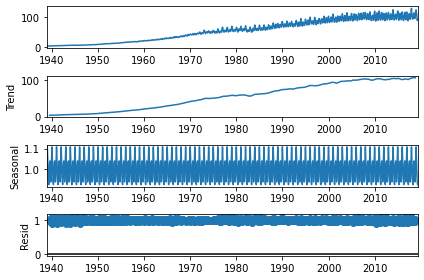

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')

fig = result.plot()

In [119]:
from pmdarima import auto_arima

In [120]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12, # Seasonality is 12 months
                           start_P=0, seasonal=True, # Seasonal variations - yearly trend
                           d=1, D=1, trace=True, # Print Status on the fits. Verbose output
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3802.455, Time=0.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4319.328, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4151.688, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3927.033, Time=0.19 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3801.631, Time=0.45 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3983.354, Time=0.37 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3771.642, Time=0.95 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3855.143, Time=0.68 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3752.073, Time=1.95 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3794.365, Time=1.71 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3853.198, Time=2.00 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=3897.166, Time=1.88 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3751.732, Time=2.16 sec
 ARIMA(2,1,1)(1,1,2)[12]

In [121]:
train = data.loc['1939-01-01':'2015-12-01']
test = data.loc['2016-01-01':]

## Train Model

In [122]:
stepwise_model.fit(train)

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

## Evaluation

In [123]:
future_forecast = stepwise_model.predict(n_periods=41)

In [124]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['Prediction'])

In [125]:
pd.concat([test, future_forecast], axis=1).iplot()

In [126]:
pd.concat([data,future_forecast],axis=1).iplot()

## Forcasting for next year

In [128]:
stepwise_model.fit(data)   # Train model with full data

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [129]:
future_forecast_1year = stepwise_model.predict(n_periods=13)

In [130]:
next_year = [pd.to_datetime('2019-05-01'),
            pd.to_datetime('2019-06-01'),
            pd.to_datetime('2019-07-01'),
            pd.to_datetime('2019-08-01'),
            pd.to_datetime('2019-09-01'),
            pd.to_datetime('2019-10-01'),
            pd.to_datetime('2019-11-01'),
            pd.to_datetime('2019-12-01'),
            pd.to_datetime('2020-01-01'),
            pd.to_datetime('2020-02-01'),
            pd.to_datetime('2020-03-01'),
            pd.to_datetime('2020-04-01'),
            pd.to_datetime('2020-05-01')]

In [132]:
future_forecast_1year = pd.DataFrame(future_forecast_1year, index=next_year, columns=['Prediction'])

In [133]:
pd.concat([data,future_forecast_1year],axis=1).iplot()

In [134]:
# Future forecast for next two years
future_forecast_2years = stepwise_model.predict(n_periods=25)

In [135]:
next_year = [pd.to_datetime('2019-05-01'),
            pd.to_datetime('2019-06-01'),
            pd.to_datetime('2019-07-01'),
            pd.to_datetime('2019-08-01'),
            pd.to_datetime('2019-09-01'),
            pd.to_datetime('2019-10-01'),
            pd.to_datetime('2019-11-01'),
            pd.to_datetime('2019-12-01'),
            pd.to_datetime('2020-01-01'),
            pd.to_datetime('2020-02-01'),
            pd.to_datetime('2020-03-01'),
            pd.to_datetime('2020-04-01'),
            pd.to_datetime('2020-05-01'),
            pd.to_datetime('2020-06-01'),
            pd.to_datetime('2020-07-01'),
            pd.to_datetime('2020-08-01'),
            pd.to_datetime('2020-09-01'),
            pd.to_datetime('2020-10-01'),
            pd.to_datetime('2020-11-01'),
            pd.to_datetime('2020-12-01'),
            pd.to_datetime('2021-01-01'),
            pd.to_datetime('2021-02-01'),
            pd.to_datetime('2021-03-01'),
            pd.to_datetime('2021-04-01'),
            pd.to_datetime('2021-05-01')]

In [136]:
future_forecast_2years = pd.DataFrame(future_forecast_2years, index=next_year, columns=['Prediction'])

In [137]:
pd.concat([data,future_forecast_2years],axis=1).iplot()

# Natural Language Processing

In [138]:
import nltk

## Tokenize words

In [139]:
from nltk.tokenize import sent_tokenize, word_tokenize
 
data = "All work and no play makes jack a dull boy. All work and no play !"
print(word_tokenize(data))

['All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', '.', 'All', 'work', 'and', 'no', 'play', '!']


# NLTK Stop words

In [144]:
from nltk.corpus import stopwords

In [145]:
stopWords = set(stopwords.words('english'))

In [146]:
print(len(stopWords))
print(stopWords)

179
{"doesn't", 'but', 'himself', 'until', 'theirs', "shan't", 'only', 'on', "aren't", 'had', 'in', 's', "you'll", 'doing', 'those', "won't", 'his', 'being', 'off', 're', "she's", "hadn't", 'mightn', 'so', 'who', 'mustn', 'why', 'our', 'didn', 'this', 'nor', 'that', 'now', 'down', 'did', 'below', 'very', 'these', 'for', 'and', 'at', 'you', 'herself', 'after', "don't", "haven't", 'y', 'does', "wouldn't", 'do', 'before', 'which', 'what', 'further', 'both', 'each', 'out', 'where', 'weren', 've', 'has', 'my', 'as', 'ours', 'from', 't', 'll', "mustn't", 'again', 'any', 'against', 'itself', 'by', 'about', 'him', 'yours', 'over', 'o', 'been', 'when', 'more', "needn't", 'won', 'needn', 'don', "hasn't", "mightn't", 'be', 'no', 'myself', 'am', 'it', 'i', 'ain', "isn't", "wasn't", 'they', 'if', 'with', "couldn't", 'should', 'doesn', "it's", 'themselves', 'of', 'shan', 'she', 'because', 'haven', 'most', 'having', "didn't", 'how', 'd', 'ourselves', 'have', "weren't", 'some', 'her', 'will', 'was', '

## NLTK - Stemming

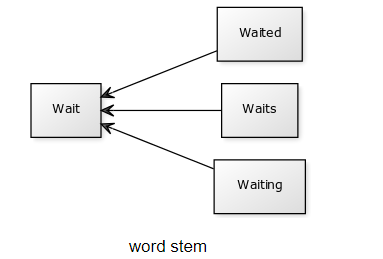

In [147]:
from nltk.stem import PorterStemmer
 
words = ["game","gaming","gamed","games"]
ps = PorterStemmer()
 
for word in words:
    print(ps.stem(word))

game
game
game
game


In [148]:
words = ['study', 'studying', 'studies', 'studious']

for word in words:
    print(word + ":" + ps.stem(word))

study:studi
studying:studi
studies:studi
studious:studiou


## Lemmetization

In [155]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence_words = ['study', 'studying', 'studies', 'studious']

for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))

study               study               
studying            study               
studies             study               
studious            studious            


## NLTK - Speech Tagging

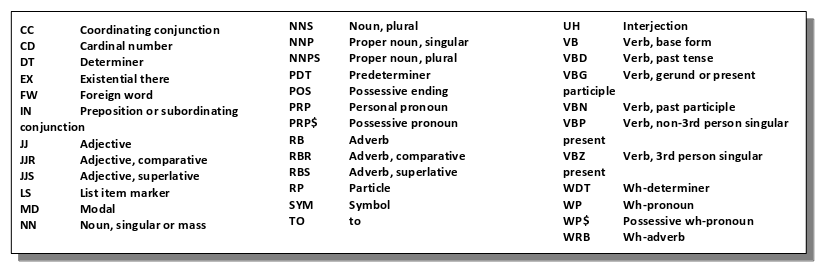

In [158]:
import nltk
 
document = 'Whether you\'re new to programming or an experienced developer, it\'s easy \
to learn and use Python.'
sentences = nltk.sent_tokenize(document)   
for word in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(word)))

[('Whether', 'IN'), ('you', 'PRP'), ("'re", 'VBP'), ('new', 'JJ'), ('to', 'TO'), ('programming', 'VBG'), ('or', 'CC'), ('an', 'DT'), ('experienced', 'JJ'), ('developer', 'NN'), (',', ','), ('it', 'PRP'), ("'s", 'VBZ'), ('easy', 'JJ'), ('to', 'TO'), ('learn', 'VB'), ('and', 'CC'), ('use', 'VB'), ('Python', 'NNP'), ('.', '.')]


In [159]:
document = 'Today the Netherlands celebrates King\'s Day. To honor this tradition, the Dutch embassy in San Francisco invited me to'
sentences = nltk.sent_tokenize(document)   
 
data = []
for sent in sentences:
    data = data + nltk.pos_tag(nltk.word_tokenize(sent))
    
for word in data: 
    if 'NNP' in word[1]: 
        print(word)

('Netherlands', 'NNP')
('King', 'NNP')
('Day', 'NNP')
('San', 'NNP')
('Francisco', 'NNP')


In [160]:
document = 'Today the Netherlands celebrates King\'s Day. To honor this tradition, the Dutch embassy in San Francisco invited me to'
sentences = nltk.sent_tokenize(document)  

In [161]:
sentences

["Today the Netherlands celebrates King's Day.",
 'To honor this tradition, the Dutch embassy in San Francisco invited me to']

In [162]:
data = []
for sent in sentences:
    data = data + nltk.pos_tag(nltk.word_tokenize(sent))
    
data

[('Today', 'NN'),
 ('the', 'DT'),
 ('Netherlands', 'NNP'),
 ('celebrates', 'VBZ'),
 ('King', 'NNP'),
 ("'s", 'POS'),
 ('Day', 'NNP'),
 ('.', '.'),
 ('To', 'TO'),
 ('honor', 'VB'),
 ('this', 'DT'),
 ('tradition', 'NN'),
 (',', ','),
 ('the', 'DT'),
 ('Dutch', 'JJ'),
 ('embassy', 'NN'),
 ('in', 'IN'),
 ('San', 'NNP'),
 ('Francisco', 'NNP'),
 ('invited', 'VBD'),
 ('me', 'PRP'),
 ('to', 'TO')]

In [163]:
for word in data: 
    if 'NNP' in word[1]: 
        print(word)

('Netherlands', 'NNP')
('King', 'NNP')
('Day', 'NNP')
('San', 'NNP')
('Francisco', 'NNP')


## Count Vectorizer

In [167]:
corpus = [ "This is my first corpus", "Processing it for ML", "Doing ML is awesome",
    "This is fun to look at", "ML is life, ML is interest"
]

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [170]:
x = cv.fit_transform(corpus)
x

<5x17 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [171]:
x.toarray()

array([[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0]], dtype=int64)

In [172]:
cv.vocabulary_

{'this': 15,
 'is': 8,
 'my': 13,
 'first': 4,
 'corpus': 2,
 'processing': 14,
 'it': 9,
 'for': 5,
 'ml': 12,
 'doing': 3,
 'awesome': 1,
 'fun': 6,
 'to': 16,
 'look': 11,
 'at': 0,
 'life': 10,
 'interest': 7}

In [174]:
cv.get_feature_names()

['at',
 'awesome',
 'corpus',
 'doing',
 'first',
 'for',
 'fun',
 'interest',
 'is',
 'it',
 'life',
 'look',
 'ml',
 'my',
 'processing',
 'this',
 'to']

# Wordcloud

In [175]:
spam_df = pd.read_csv("spam.csv", encoding='ISO-8859-1', engine='c')
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [176]:
# select the required coolumns
spam_df = spam_df[['v1', 'v2']]
spam_df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [178]:
spam_df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [179]:
spam_df.shape

(5572, 2)

In [180]:
spam_df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [181]:
from wordcloud import WordCloud

In [182]:
spam_list = spam_df[spam_df["target"] == "spam"]["text"].unique().tolist()
spam_list[:2]

["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"]

In [183]:
len(spam_list)

653

In [184]:
spam = " ".join(spam_list)
spam[:100]

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr'

In [185]:
# create a word cloud for spam
spam_wordcloud = WordCloud().generate(spam)

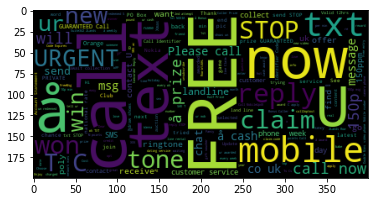

In [186]:
plt.figure()
plt.imshow(spam_wordcloud)
plt.show()

# Deep Learning

## Classifying handwritten digits

In [188]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [189]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [190]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)

In [ ]:
values at each pixel are integer values 0-255. black-grey-white

In [191]:
# convert interger values to float 32 values
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [192]:
# normalise each value to 0 to 1 scale
train_images /= 255
test_images /= 255

In [194]:
# Converting labels to one hot encoded format
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

In [199]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [200]:
train_labels[0].argmax()

5

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


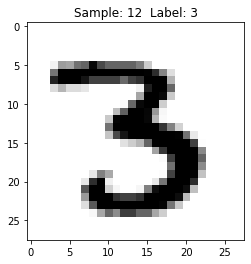

In [204]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(12)

In [206]:
# Model Build based on Tensorflow Keras
model = Sequential() 
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax')) 

In [207]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [208]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [211]:
# Training of model
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=20,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/20
600/600 - 2s - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.0797 - val_accuracy: 0.9803
Epoch 2/20
600/600 - 2s - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0765 - val_accuracy: 0.9821
Epoch 3/20
600/600 - 2s - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0842 - val_accuracy: 0.9807
Epoch 4/20
600/600 - 2s - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0863 - val_accuracy: 0.9816
Epoch 5/20
600/600 - 2s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0890 - val_accuracy: 0.9814
Epoch 6/20
600/600 - 2s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0911 - val_accuracy: 0.9821
Epoch 7/20
600/600 - 2s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0967 - val_accuracy: 0.9821
Epoch 8/20
600/600 - 2s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0944 - val_accuracy: 0.9820
Epoch 9/20
600/600 - 2s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.1029 - val_accuracy: 0.9822
Epoch 10/20
600/600 - 2s - loss: 6.0851e-04 - accuracy: 0.9999 - val_loss: 0.1035 - val_accuracy: 0.

In [212]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12417346239089966
Test accuracy: 0.9829999804496765


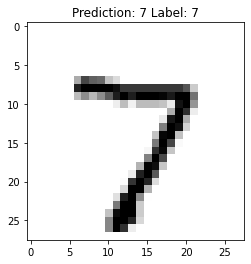

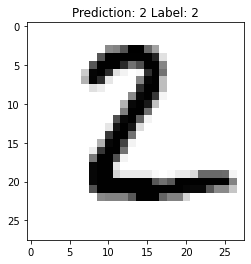

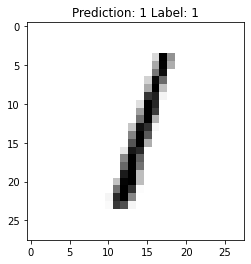

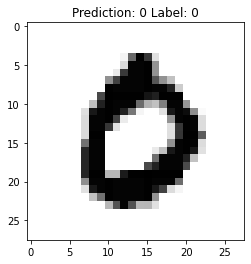

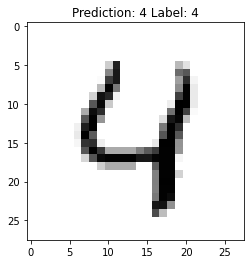

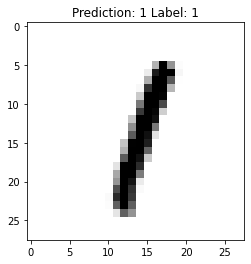

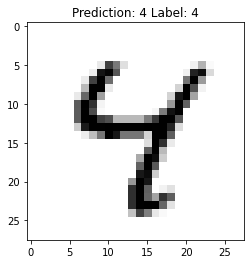

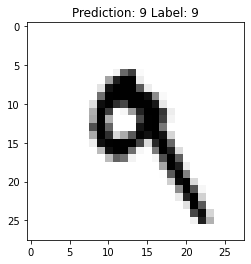

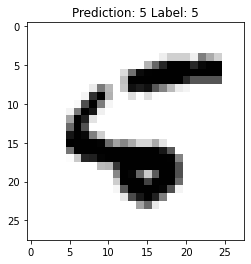

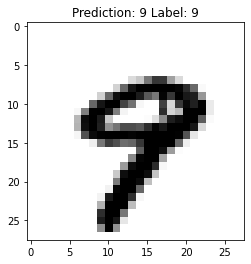

In [213]:
for x in range(10):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    #if (predicted_cat != label):
    if (predicted_cat == label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

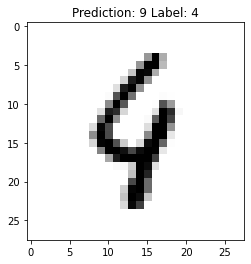

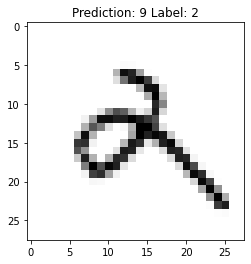

In [218]:
# let us see incorrectly predicted images
for x in range(200):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
    #if (predicted_cat == label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()